##Prep

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
from sklearn.utils import resample
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from google.colab import drive
from sklearn.utils import resample
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, roc_curve, auc, classification_report
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.metrics import log_loss, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

'import pandas as pd\nfrom sklearn.utils import resample\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.svm import SVC\nfrom sklearn.metrics import accuracy_score\nfrom sklearn.metrics import classification_report\nimport matplotlib.pyplot as plt\nfrom sklearn.metrics import roc_curve, auc\nfrom google.colab import drive\nfrom sklearn.utils import resample\nimport pandas as pd\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score, classification_report, confusion_matrix\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.ensemble import RandomForestClassifier\nfrom sklearn.metrics import accuracy_score, classification_report, roc_curve, auc\nimport matplotlib.pyplot as plt\nfrom imblearn.over_sampling import SMOTE\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.linear_model import LogisticRegression\nfrom sklearn.metrics import accuracy_score, roc_curve, auc, classification_report\nimpor

In [ ]:
import pandas as pd
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from google.colab import drive
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
import numpy as np
from xgboost import XGBClassifier
import warnings


In [ ]:
# Get the path to the CSV file on Drive
csv_path = "/content/drive/MyDrive/Data Mining/Project/Data/final_scaled.csv"

# Read the CSV file into a Pandas DataFrame
final_scaled = pd.read_csv(csv_path)

final_scaled = final_scaled.drop(columns=['msno'])

##Feature Selection

In [ ]:
X = final_scaled.drop('is_churn', axis=1)
y = final_scaled['is_churn']

rfc = RandomForestClassifier(random_state=42)
rfc.fit(X, y)

feature_importances = rfc.feature_importances_

importances_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importances_df = importances_df.sort_values(by='Importance', ascending=False)

top_20_features = importances_df.nlargest(20, 'Importance')['Feature'].tolist()
columns_to_include = ['is_churn']

#merge columns_to_include and top_20_features

selected_features = columns_to_include + top_20_features
final_selected = final_scaled[selected_features]


##Data Balancing - Downsampling

In [ ]:
# Separate majority and minority classes
majority_class = final_selected[final_selected['is_churn'] == 0]
minority_class = final_selected[final_selected['is_churn'] == 1]

# Downsample majority class
majority_downsampled = resample(majority_class,
                                replace=False,  # Sample without replacement
                                n_samples=len(minority_class),  # Match minority class
                                random_state=42)  # Reproducible results

# Combine minority class with downsampled majority class
downsampled_data = pd.concat([majority_downsampled, minority_class])

##Models

##Data Prep for Models

In [ ]:
#downsampled data
# Split the data into features and target
X1 = downsampled_data.drop('is_churn', axis=1)
y1 = downsampled_data['is_churn']

# Split the data into training and testing sets
X1_train, X1_test, y1_train, y1_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% testing

#without downsampled data
X2 = final_selected.drop('is_churn', axis=1)
y2 = final_selected['is_churn']

# Split the data into training and testing sets
X2_train, X2_test, y2_train, y2_test = train_test_split(X, y, test_size=0.3, random_state=42)  # 70% training and 30% testing

# Assuming 'data' is your DataFrame
X = final_selected.drop('is_churn', axis=1)
y = final_selected['is_churn']

# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Split the resampled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)



###Random Forest With Downsampling

Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99    203889
           1       0.93      0.85      0.89     13828

    accuracy                           0.99    217717
   macro avg       0.96      0.93      0.94    217717
weighted avg       0.99      0.99      0.99    217717



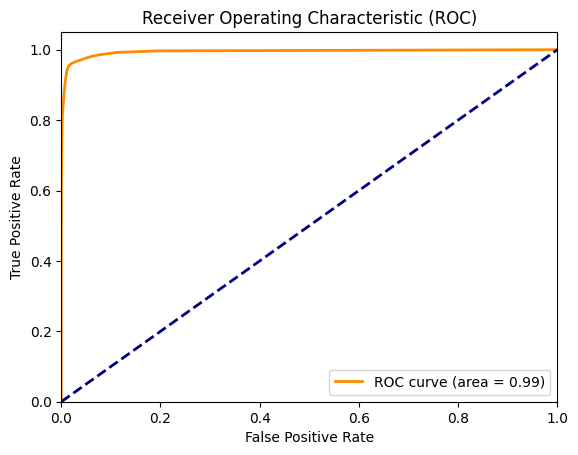

In [ ]:
# Initialize the Random Forest classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training set
clf.fit(X1_train, y1_train)

# Predict on the testing set
y_pred = clf.predict(X1_test)
y_prob = clf.predict_proba(X1_test)[:, 1]  # probabilities for the positive class

# Evaluate the model
accuracy = accuracy_score(y1_test, y_pred)
print("Classification Report:")
print(classification_report(y1_test, y_pred))

# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y1_test, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting ROC Curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

###Random Forest Without Downsampling

Classification Report:
               precision    recall  f1-score   support

           0       0.98      1.00      0.99    203889
           1       0.95      0.75      0.84     13828

    accuracy                           0.98    217717
   macro avg       0.97      0.87      0.91    217717
weighted avg       0.98      0.98      0.98    217717



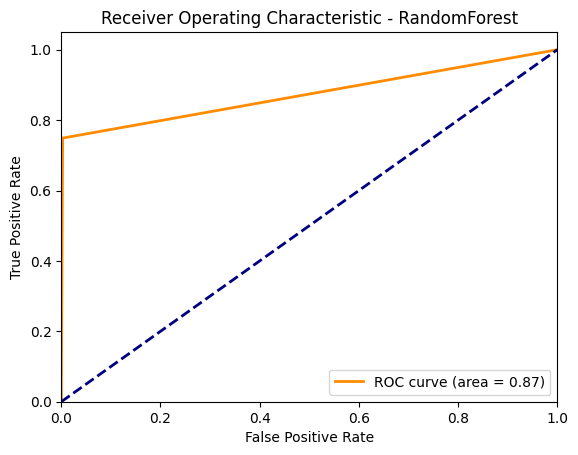

In [ ]:
# Create a RandomForest Classifier with adjusted parameters
clf = RandomForestClassifier(
    n_estimators=200,
    max_depth=10,
    min_samples_split=50,
    min_samples_leaf=20,
    max_features='sqrt',
    random_state=42
)

# Train the model using the training sets
clf.fit(X2_train, y2_train)

# Predict the response for test dataset
y_pred = clf.predict(X2_test)

# Evaluate the model
print("Classification Report:\n", classification_report(y2_test, y_pred))


# Calculate ROC curve and ROC area
fpr, tpr, _ = roc_curve(y2_test, y_pred)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic - RandomForest')
plt.legend(loc="lower right")
plt.show()


###LR With Balancing - SMOTE

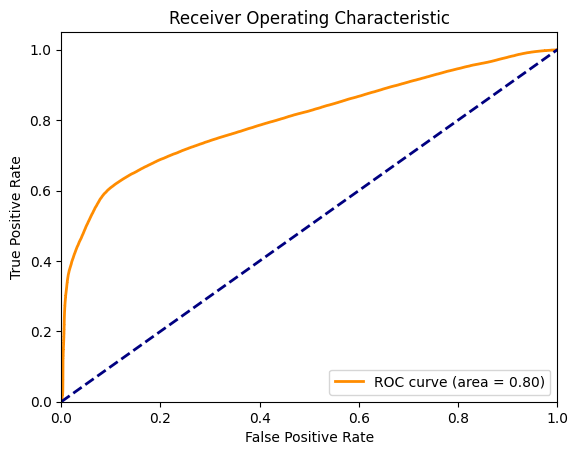

              precision    recall  f1-score   support

           0       0.73      0.73      0.73    135448
           1       0.73      0.73      0.73    136200

    accuracy                           0.73    271648
   macro avg       0.73      0.73      0.73    271648
weighted avg       0.73      0.73      0.73    271648



In [ ]:
warnings.filterwarnings('ignore')

# Create and fit the logistic regression model with regularization
model = LogisticRegression(C=0.1)  # Stronger regularization with C=0.1
model.fit(X_train, y_train)

# Generate predictions for the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Define a range of training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the training and testing scores for each training set size
train_scores = []
test_scores = []
for train_size in train_sizes:
    n_train = int(train_size * len(X_train))
    X_train_subset = X_train[:n_train]
    y_train_subset = y_train[:n_train]
    model.fit(X_train_subset, y_train_subset)
    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X_test)
    train_scores.append(accuracy_score(y_train_subset, y_train_pred))
    test_scores.append(accuracy_score(y_test, y_test_pred))



# Generate predictions for the test set
y_pred = model.predict(X_test)

# Generate classification report
print(classification_report(y_test, y_pred))

###LR Without Downsampling

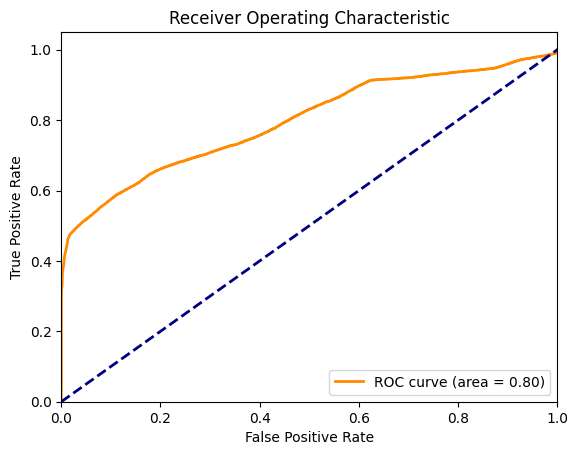

              precision    recall  f1-score   support

           0       0.96      1.00      0.98    203889
           1       0.92      0.34      0.50     13828

    accuracy                           0.96    217717
   macro avg       0.94      0.67      0.74    217717
weighted avg       0.95      0.96      0.95    217717



In [ ]:
warnings.filterwarnings('ignore')

# Create and fit the logistic regression model
model = LogisticRegression()
model.fit(X2_train, y2_train)

# Generate predictions for the test set
y_pred_proba = model.predict_proba(X2_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y2_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()
"""
# Define a range of training set sizes
train_sizes = np.linspace(0.1, 1.0, 10)

# Calculate the training and testing scores for each training set size
train_scores = []
test_scores = []
for train_size in train_sizes:
    n_train = int(train_size * len(X2_train))
    X_train_subset = X_train[:n_train]
    y_train_subset = y_train[:n_train]
    model.fit(X_train_subset, y_train_subset)
    y_train_pred = model.predict(X_train_subset)
    y_test_pred = model.predict(X2_test)
    train_scores.append(accuracy_score(y_train_subset, y_train_pred))
    test_scores.append(accuracy_score(y2_test, y_test_pred))

# Plot the learning curve
plt.figure()
plt.plot(train_sizes, train_scores, label='Training score')
plt.plot(train_sizes, test_scores, label='Testing score')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve')
plt.legend()
plt.show()
"""



# Generate predictions for the test set
y_pred = model.predict(X2_test)

# Generate classification report
print(classification_report(y2_test, y_pred))

###XGBoost With Downsampling

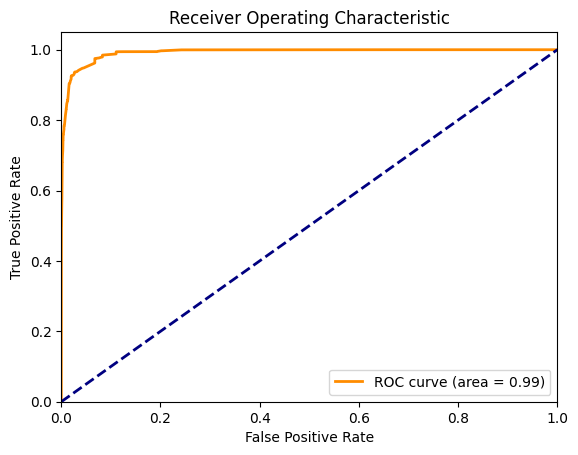


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    203889
           1       0.92      0.76      0.83     13828

    accuracy                           0.98    217717
   macro avg       0.95      0.88      0.91    217717
weighted avg       0.98      0.98      0.98    217717



In [ ]:
# Define the XGBoost classifier
xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1)

# Fit the model on the training data
xgbc.fit(X1_train, y1_train)

# Predict probabilities for the test set
y_pred_proba = xgbc.predict_proba(X1_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y1_test, y_pred_proba)
roc_auc = roc_auc_score(y1_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Generate classification report
y_pred = xgbc.predict(X1_test)
print('\nClassification Report:')
print(classification_report(y1_test, y_pred))


###XGBoost Without Downsampling

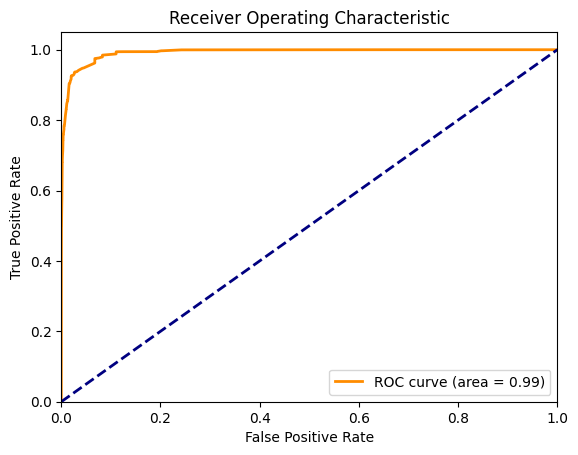


Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99    203889
           1       0.92      0.76      0.83     13828

    accuracy                           0.98    217717
   macro avg       0.95      0.88      0.91    217717
weighted avg       0.98      0.98      0.98    217717



In [ ]:
# Define the XGBoost classifier
xgbc = XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.01, max_delta_step=0, max_depth=3,
              min_child_weight=1, n_estimators=500, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1)

# Fit the model on the training data
xgbc.fit(X2_train, y2_train)

# Predict probabilities for the test set
y_pred_proba = xgbc.predict_proba(X2_test)[:, 1]

# Calculate ROC curve
fpr, tpr, _ = roc_curve(y2_test, y_pred_proba)
roc_auc = roc_auc_score(y2_test, y_pred_proba)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Generate classification report
y_pred = xgbc.predict(X2_test)
print('\nClassification Report:')
print(classification_report(y2_test, y_pred))


###SVM With Downsampling

In [ ]:
# Split data into train and test sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split training set into train and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_full, y_train_full, test_size=0.2, random_state=42)

from sklearn.svm import SVC
# Create SVM classifier with specified hyperparameters
svm_model = SVC(kernel='linear', C=0.1, max_iter=100000)

#Train SVM model
svm_model.fit(X1_train, y1_train)

from sklearn.metrics import accuracy_score

y_val_pred = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)


y_test_pred = svm_model.predict(X1_test)
test_accuracy = accuracy_score(y1_test, y_test_pred)

from sklearn.metrics import classification_report

# Assuming you have already trained your SVM model and obtained predictions on the test set
y_pred = svm_model.predict(X1_test)

# Generate classification report
report = classification_report(y1_test, y_pred)

print("Classification Report:")
print(report)

# Generate ROC curve plot
y_score = svm_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y1_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


###SVM Without Downsampling

In [ ]:
# Create SVM classifier with specified hyperparameters
svm_model = SVC(kernel='linear', C=0.1,max_iter=100000)

# Train SVM model
svm_model.fit(X2_train, y2_train)

y_val_pred = svm_model.predict(X_val)
val_accuracy = accuracy_score(y_val, y_val_pred)

y_test_pred = svm_model.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)

# Assuming you have already trained your SVM model and obtained predictions on the test set
y_pred = svm_model.predict(X_test)

# Generate classification report
report = classification_report(y_test, y_pred)

print("Classification Report:")
print(report)

# Generate ROC curve plot
y_score = svm_model.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()
